<a href="https://colab.research.google.com/github/ethanweed/praat-workshop/blob/main/advanced_vowelspace_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting vowel spaces


<img src="https://upload.wikimedia.org/wikipedia/commons/8/87/Vowel_triange%2C_cardinal_vowels.png" width="400"/>

image credit: Kwamikagami (wikipedia.org)


Let's compare different speakers producing the vowels in English words 'heed', 'hid', 'head', 'had', 'hod', 'hawed', 'hood', and 'who'd'.

<img src="https://kagi.com/proxy/images?c=_m3km2RjA3G0qleowsZXHZb9NEn0fSsEYIHbKzMDyAFb4nUPIanknmQV_g0rmdCIbMWuvyo7994ui97cT-3EedvKHC3hiNCl3h5OMx-XVM9HyXvCWU_IGx_mPDPr1dfEaGFA-mOvqORHh0X-9LrKmg%3D%3D" width="400"/>

image credit: www.phonetics.ucla.edu

<img src="https://kagi.com/proxy/tongue.png?c=VyuR3YRKUClPhyOoIdS04TqljqgBzrKDxski68jlhLPReVad1H0Zm0Kgd4UwEzxC-foBCJc2-1ghyNdX1b6XRg%3D%3D" width="400"/>

image credit: Wilfred Bates



# Plot vowels

Let's use Python to plot our extracted formant vowels and inspect our vowels spaces.
We'll start with a very simple figure, where we simply plot the raw F1 and F2 frequencies for the cardinal vowels.
Things to notice:
1. We need to import libraries
2. We use `pandas` to import and structure our data
3. We use `seaborn` to make plotting easier
4. We use `matplotlib.pyplot` to make adjustments to our figure
5. We rename libraries with abreviations

In [47]:
# import data structuring and plotting libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# quiet warnings
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Read our txt file into a pandas dataframe
#df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/praat-workshop/refs/heads/main/2025/output/h_d_formants/combined_formants.txt', sep='\t')
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/praat-workshop/refs/heads/main/2025/output/cardinal_vowels_formants/combined_formants.txt', sep='\t')

# inspect the first 5 lines
df

,Interval,Label,Start,End,Duration,F1,F2,F3,Source_File
0,1,Segment_1,0.000,0.904,0.904,372.5,2399.2,3187.5,cardinal_vowels_formants
1,3,Segment_2,1.192,2.136,0.944,406.6,2300.7,2779.0,cardinal_vowels_formants
2,5,Segment_3,2.512,3.440,0.928,693.6,1941.5,2768.5,cardinal_vowels_formants
3,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,cardinal_vowels_formants
4,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,cardinal_vowels_formants
5,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,cardinal_vowels_formants
6,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,cardinal_vowels_formants
7,15,Segment_8,8.664,9.777,1.112,380.2,1095.7,2927.1,cardinal_vowels_formants
8,2,Segment_1,0.289,0.817,0.528,228.6,2325.2,3105.1,kardinalvokaler_formants
9,4,Segment_2,1.953,2.489,0.536,398.7,2079.3,2563.9,kardinalvokaler_formants


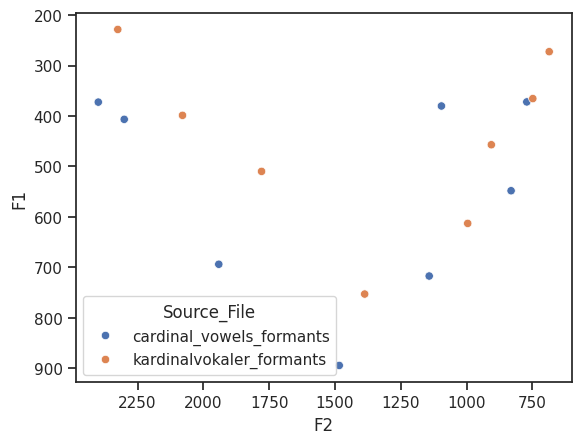

In [49]:
ax = sns.scatterplot(data=df, x=df['F2'], y=df['F1'], hue=df['Source_File'])
ax.invert_yaxis()
ax.invert_xaxis()

## Fancier vowel plots using helper functions

The vowelplot, barkify, and Lobify functions below were written by [Emily Remirez](https://sites.google.com/berkeley.edu/eremirez/) and copied from: [Linguistics Methods Hub: Vowel plotting in Python](https://lingmethodshub.github.io/content/python/vowel-plotting-py/index.html).

Using Emily's functions, we can quickly and easily make professional-looking vowel plots for comparing speakers, dialects, or languages.


In [50]:
# vowelplot function
# written by Emily Remirez
# small modification to remove left and right spines by Ethan Weed

import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def vowelplot(vowelcsv, color=None, F1="F1", F2="F2", vowel="Vowel", title="Vowel Plot", unit="Hz", logscale=True):

    #Set some parameters for the chart itself
    sns.set(style='ticks', context='notebook')
    plt.figure(figsize=(10,8))  # Increased width to accommodate legend
    # If there's an argument for color, determine whether it's likely to be categorical
    ## If it's a string (text), use a categorical color palette
    ## If it's a number, use a sequential color palette
    if color != None:
        if type(vowelcsv[color].iloc[0])==str:
            pal = "husl"
            #pal = "Dark2"
        else:
            pal = "viridis"

        pl = sns.scatterplot(x=F2,
                             y=F1,
                             hue=color,
                             data=vowelcsv,
                             palette=pal)

        # Move legend outside the figure
        pl.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    # If no color argument is given, don't specify hue, and no palette needed
    else:
        pl = sns.scatterplot(x=F2,
                             y=F1,
                             data=vowelcsv)


    #Invert axes to correlate with articulatory space!
    pl.invert_yaxis()
    pl.invert_xaxis()

    #Add unit to the axis labels
    F1name = str("F1 ("+unit+")")
    F2name = str("F2 ("+unit+")")
    laby = plt.ylabel(F1name)
    labx = plt.xlabel(F2name)

    if logscale == True:
        pl.loglog()
        pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
        pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())

    # Add vowel labels
    if vowel != None:
        for line,row in vowelcsv.iterrows():
            pl.text(vowelcsv[F2][line]+0.1,
                    vowelcsv[F1][line],
                    vowelcsv[vowel][line],
                    horizontalalignment = 'left',
                    size = 14, # Edit for larger plots!
                    color = 'black',
                   # weight = 'semibold' # Uncomment for larger plots!
                   )

    pl.set_title(title)
    pl.spines['top'].set_visible(False)
    pl.spines['right'].set_visible(False)

    # Add tight layout to adjust spacing for the legend
    plt.tight_layout()
    plt.show()

    return pl


In [51]:
# function to convert formants from Hz to bark units
# a bark scale is a better approximation of our nonliear pyschoacoustic perception of the physical sound frequencies

def barkify (data, formants):
    # For each formant listed, make a copy of the column prefixed with z
    for formant in formants:
        for ch in formant:
            if ch.isnumeric():
                num = ch
        formantchar = (formant.split(num)[0])
        name = str(formant).replace(formantchar,'z')
        # Convert each value from Hz to Bark
        data[name] = 26.81/ (1+ 1960/data[formant]) - 0.53
    # Return the dataframe with the changes
    return data

In [52]:
# a function to normalize formants based on each speaker's vowel space, using the Lobanov method.
# for details and descriptions, including pros and cons for each method, as well as an online tool for using the different algorithms, see http://lingtools.uoregon.edu/norm/norm1_methods.php

def Lobify (data, group, formants):
    zscore = lambda x: (x - x.mean()) / x.std()
    for formant in formants:
        name = str("zsc_" + formant)
        col = data.groupby([group])[formant].transform(zscore)
        data.insert(len(data.columns), name, col)
    return data


Load the data into a `pandas` dataframe

In [53]:
# load the data into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/praat-workshop/refs/heads/main/2025/output/h_d_formants/combined_formants.txt', sep='\t')

#labels = ['heed', 'hid', 'head', 'had', 'hod', 'hawed', 'hood', 'whod']
#labels = ['i', 'I', 'ɛ', 'æ', 'ɑ', 'ɔ', 'ʊ', 'u']

# Make a new column called speaker with the string bewten "h_d_" and "_formants" in Source_File
df['Speaker'] = df['Source_File'].str.extract(r'(h_d_)(.*)(_formants)')[1]

label_dict = {
    'Segment_1': 'i',
    'Segment_2': 'I',
    'Segment_3': 'ɛ',
    'Segment_4': 'æ',
    'Segment_5': 'ɑ',
    'Segment_6': 'ɔ',
    'Segment_7': 'ʊ',
    'Segment_8': 'u'
}

# Make a column called vowel. Look up the key in the Label column and return the value from the label_dict
df['Vowel'] = df['Label'].map(label_dict)

# Make a new column called dialect with the string in speaker removing any numbers
df['Dialect'] = df['Speaker'].str.extract(r'([a-zA-Z]+)')[0]




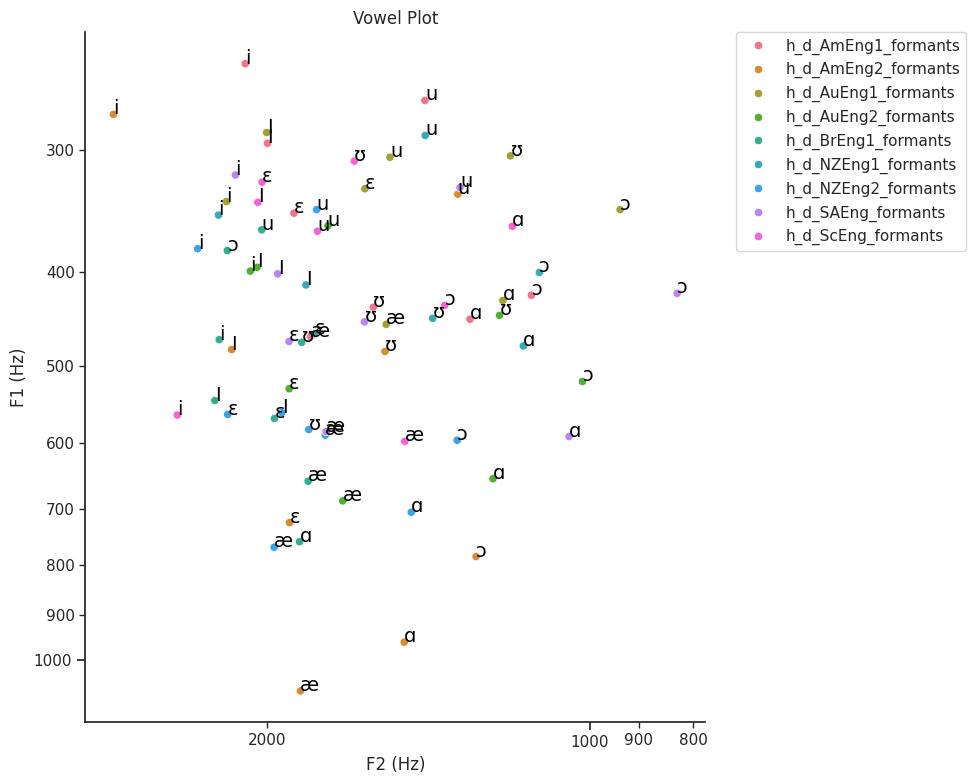

<Axes: title={'center': 'Vowel Plot'}, xlabel='F2 (Hz)', ylabel='F1 (Hz)'>

In [54]:
vowelplot(df, color = 'Source_File')

In [55]:
barkify(df, ["F1","F2"])

,Interval,Label,Start,End,Duration,F1,F2,F3,Source_File,Speaker,Vowel,Dialect,z1,z2
0,2,Segment_1,0.218,0.530,0.312,244.8,2096.7,2810.6,h_d_AmEng1_formants,AmEng1,i,AmEng,2.446727,13.326713
1,4,Segment_2,1.098,1.450,0.352,295.4,1998.6,2687.1,h_d_AmEng1_formants,AmEng1,I,AmEng,2.981428,13.005711
2,6,Segment_3,2.250,2.570,0.320,348.4,1888.2,2692.2,h_d_AmEng1_formants,AmEng1,ɛ,AmEng,3.516354,12.624889
3,8,Segment_4,3.186,3.546,0.360,466.3,1821.8,2604.2,h_d_AmEng1_formants,AmEng1,æ,AmEng,4.622497,12.385135
4,10,Segment_5,4.162,4.498,0.336,447.5,1293.4,2574.8,h_d_AmEng1_formants,AmEng1,ɑ,AmEng,4.453375,10.128405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,8,Segment_4,6.441,6.769,0.328,597.1,1487.8,2593.8,h_d_ScEng_formants,ScEng,æ,ScEng,5.730315,11.039093
68,10,Segment_5,7.785,8.049,0.264,359.4,1180.7,2698.6,h_d_ScEng_formants,ScEng,ɑ,ScEng,3.624313,9.548825
69,12,Segment_6,9.073,9.409,0.336,433.1,1365.4,2791.2,h_d_ScEng_formants,ScEng,ɔ,ScEng,4.322038,10.478112
70,14,Segment_7,10.417,10.633,0.216,308.1,1658.4,2569.8,h_d_ScEng_formants,ScEng,ʊ,ScEng,3.111886,11.757670


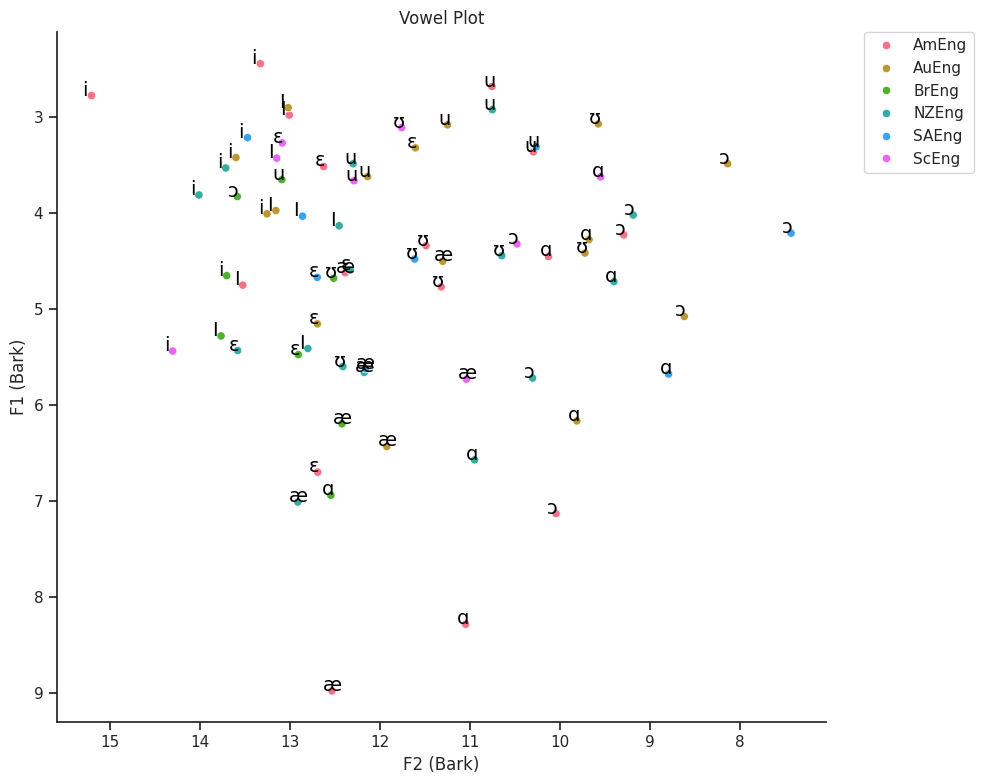

<Axes: title={'center': 'Vowel Plot'}, xlabel='F2 (Bark)', ylabel='F1 (Bark)'>

In [56]:
vowelplot(df,
          F1 = "z1",
          F2 = "z2",
          color = "Dialect",
          unit = "Bark",
          logscale = False)

In [57]:
Lobify(df,
       group = "Speaker",
       formants = ["F1","F2"]
      )

,Interval,Label,Start,End,Duration,F1,F2,F3,Source_File,Speaker,Vowel,Dialect,z1,z2,zsc_F1,zsc_F2
0,2,Segment_1,0.218,0.530,0.312,244.8,2096.7,2810.6,h_d_AmEng1_formants,AmEng1,i,AmEng,2.446727,13.326713,-1.372737,1.260466
1,4,Segment_2,1.098,1.450,0.352,295.4,1998.6,2687.1,h_d_AmEng1_formants,AmEng1,I,AmEng,2.981428,13.005711,-0.799276,0.979806
2,6,Segment_3,2.250,2.570,0.320,348.4,1888.2,2692.2,h_d_AmEng1_formants,AmEng1,ɛ,AmEng,3.516354,12.624889,-0.198615,0.663956
3,8,Segment_4,3.186,3.546,0.360,466.3,1821.8,2604.2,h_d_AmEng1_formants,AmEng1,æ,AmEng,4.622497,12.385135,1.137573,0.473989
4,10,Segment_5,4.162,4.498,0.336,447.5,1293.4,2574.8,h_d_AmEng1_formants,AmEng1,ɑ,AmEng,4.453375,10.128405,0.924508,-1.037740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,8,Segment_4,6.441,6.769,0.328,597.1,1487.8,2593.8,h_d_ScEng_formants,ScEng,æ,ScEng,5.730315,11.039093,1.682519,-0.635028
68,10,Segment_5,7.785,8.049,0.264,359.4,1180.7,2698.6,h_d_ScEng_formants,ScEng,ɑ,ScEng,3.624313,9.548825,-0.463485,-1.387119
69,12,Segment_6,9.073,9.409,0.336,433.1,1365.4,2791.2,h_d_ScEng_formants,ScEng,ɔ,ScEng,4.322038,10.478112,0.201893,-0.934787
70,14,Segment_7,10.417,10.633,0.216,308.1,1658.4,2569.8,h_d_ScEng_formants,ScEng,ʊ,ScEng,3.111886,11.757670,-0.926632,-0.217227


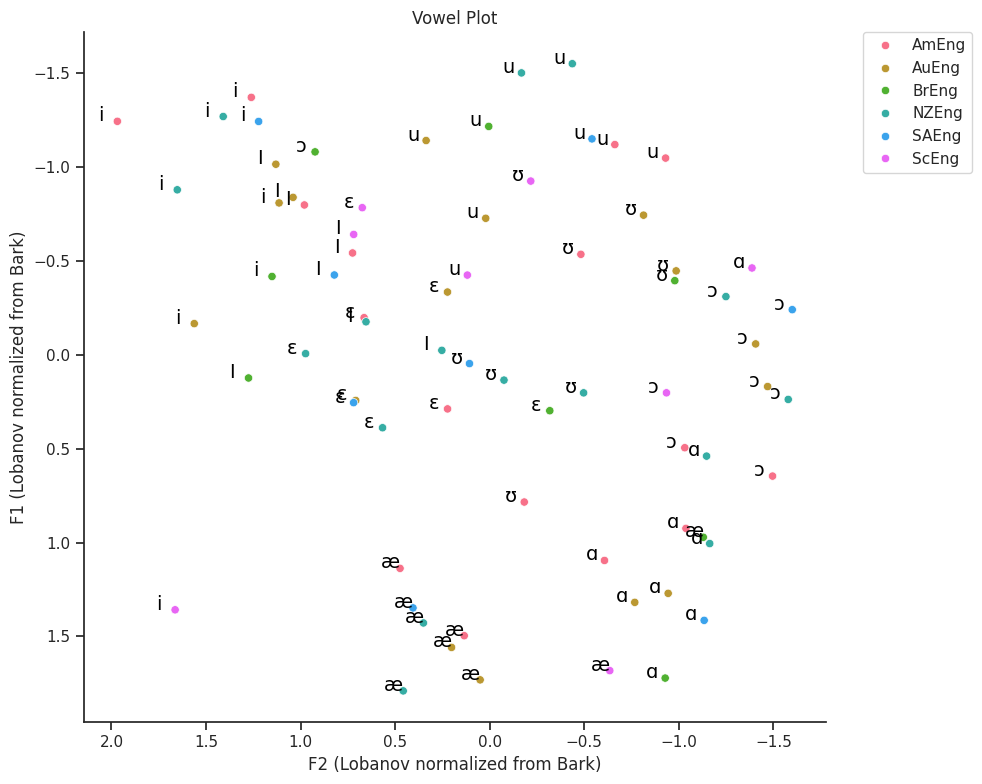

<Axes: title={'center': 'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [58]:
vowelplot(df,
          F1 = "zsc_F1",
          F2 = "zsc_F2",
          color = "Dialect",
          unit = "Lobanov normalized from Bark",
          logscale = False)


# Your vowels :-)

First we'll load your vowels into Python

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/praat-workshop/refs/heads/main/2025/output/YourVowels.csv', sep=',')

df['Speaker'] = df['Source_File']

label_dict = {
    'Segment_1': 'i',
    'Segment_2': 'I',
    'Segment_3': 'ɛ',
    'Segment_4': 'æ',
    'Segment_5': 'ɑ',
    'Segment_6': 'ɔ',
    'Segment_7': 'ʊ',
    'Segment_8': 'u'
}

# Make a column called vowel. Look up the key in the Label column and return the value from the label_dict
df['Vowel'] = df['Label'].map(label_dict)

df.head()

,Interval,Label,Start,End,Duration,F1,F2,F3,Source_File,Speaker,Vowel
0,2,Segment_1,0.320,0.624,0.304,401.5,2559.0,3458.5,Caro,Caro,i
1,4,Segment_2,2.080,2.288,0.208,426.5,1988.8,2777.7,Caro,Caro,I
2,6,Segment_3,4.008,4.216,0.208,451.5,1887.4,2658.1,Caro,Caro,ɛ
3,8,Segment_4,6.120,6.376,0.256,605.7,1751.6,2636.1,Caro,Caro,æ
4,10,Segment_5,8.304,8.520,0.216,625.6,1237.4,2434.1,Caro,Caro,ɑ


Next we'll barkify them...

In [60]:
barkify(df, ["F1","F2"])

,Interval,Label,Start,End,Duration,F1,F2,F3,Source_File,Speaker,Vowel,z1,z2
0,2,Segment_1,0.320,0.624,0.304,401.5,2559.0,3458.5,Caro,Caro,i,4.028211,14.651852
1,4,Segment_2,2.080,2.288,0.208,426.5,1988.8,2777.7,Caro,Caro,I,4.261312,12.972767
2,6,Segment_3,4.008,4.216,0.208,451.5,1887.4,2658.1,Caro,Caro,ɛ,4.489579,12.622049
3,8,Segment_4,6.120,6.376,0.256,605.7,1751.6,2636.1,Caro,Caro,æ,5.799196,12.122332
4,10,Segment_5,8.304,8.520,0.216,625.6,1237.4,2434.1,Caro,Caro,ɑ,5.956825,9.845522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,Mariya,Mariya,æ,7.868087,11.021833
76,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,Mariya,Mariya,ɑ,6.649980,9.341182
77,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,Mariya,Mariya,ɔ,5.328006,7.453158
78,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,Mariya,Mariya,ʊ,3.747690,7.041661


Then we'll Lobify them...

In [61]:
Lobify(df,
       group = "Speaker",
       formants = ["F1","F2"]
      )

,Interval,Label,Start,End,Duration,F1,F2,F3,Source_File,Speaker,Vowel,z1,z2,zsc_F1,zsc_F2
0,2,Segment_1,0.320,0.624,0.304,401.5,2559.0,3458.5,Caro,Caro,i,4.028211,14.651852,-0.750198,1.836907
1,4,Segment_2,2.080,2.288,0.208,426.5,1988.8,2777.7,Caro,Caro,I,4.261312,12.972767,-0.527422,0.683870
2,6,Segment_3,4.008,4.216,0.208,451.5,1887.4,2658.1,Caro,Caro,ɛ,4.489579,12.622049,-0.304646,0.478823
3,8,Segment_4,6.120,6.376,0.256,605.7,1751.6,2636.1,Caro,Caro,æ,5.799196,12.122332,1.069436,0.204213
4,10,Segment_5,8.304,8.520,0.216,625.6,1237.4,2434.1,Caro,Caro,ɑ,5.956825,9.845522,1.246765,-0.835583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,Mariya,Mariya,æ,7.868087,11.021833,1.732122,-0.018307
76,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,Mariya,Mariya,ɑ,6.649980,9.341182,0.845568,-0.547865
77,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,Mariya,Mariya,ɔ,5.328006,7.453158,0.000063,-1.029999
78,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,Mariya,Mariya,ʊ,3.747690,7.041661,-0.880485,-1.122521


Then we can plot them...

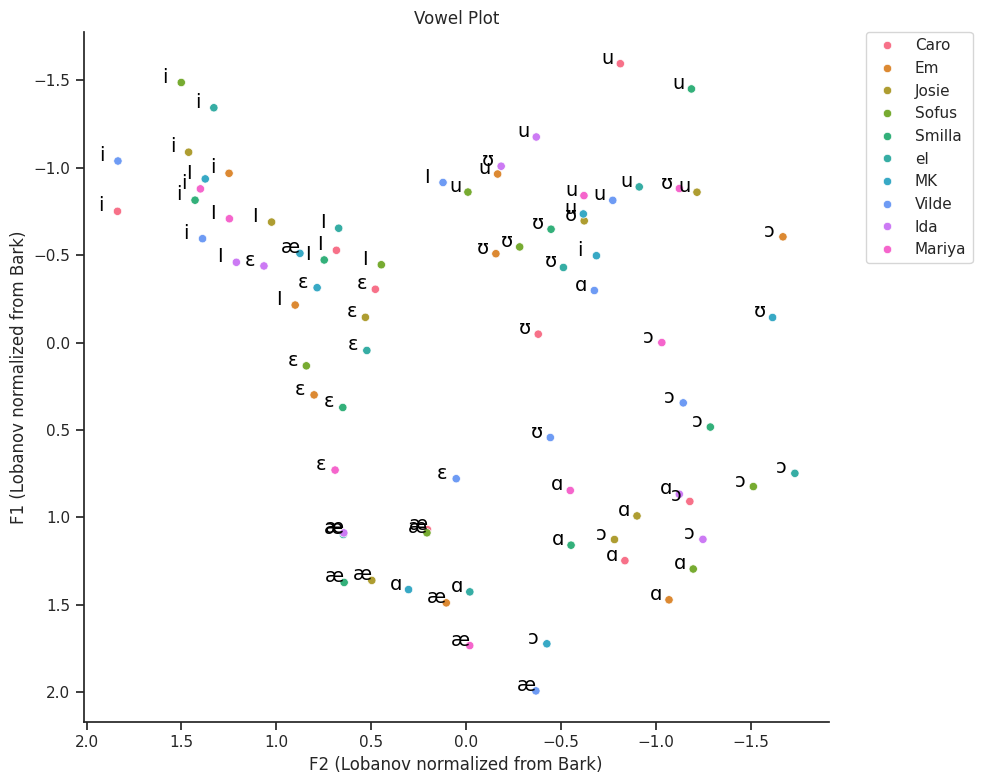

<Axes: title={'center': 'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [62]:
vowelplot(df,
          F1 = "zsc_F1",
          F2 = "zsc_F2",
          color = "Speaker",
          unit = "Lobanov normalized from Bark",
          logscale = False)

In [63]:



df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/praat-workshop/refs/heads/main/2025/output/allSpeakers.csv', sep=',')


label_dict = {
    'Segment_1': 'i',
    'Segment_2': 'I',
    'Segment_3': 'ɛ',
    'Segment_4': 'æ',
    'Segment_5': 'ɑ',
    'Segment_6': 'ɔ',
    'Segment_7': 'ʊ',
    'Segment_8': 'u'
}

# Make a column called vowel. Look up the key in the Label column and return the value from the label_dict
df['Vowel'] = df['Label'].map(label_dict)


df

,Interval,Label,Start,End,Duration,F1,F2,F3,Speaker,Vowel
0,2,Segment_1,0.218,0.530,0.312,244.8,2096.7,2810.6,American1,i
1,4,Segment_2,1.098,1.450,0.352,295.4,1998.6,2687.1,American1,I
2,6,Segment_3,2.250,2.570,0.320,348.4,1888.2,2692.2,American1,ɛ
3,8,Segment_4,3.186,3.546,0.360,466.3,1821.8,2604.2,American1,æ
4,10,Segment_5,4.162,4.498,0.336,447.5,1293.4,2574.8,American1,ɑ
...,...,...,...,...,...,...,...,...,...,...
147,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,Mariya,æ
148,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,Mariya,ɑ
149,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,Mariya,ɔ
150,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,Mariya,ʊ


In [64]:
barkify(df, ["F1","F2"])

,Interval,Label,Start,End,Duration,F1,F2,F3,Speaker,Vowel,z1,z2
0,2,Segment_1,0.218,0.530,0.312,244.8,2096.7,2810.6,American1,i,2.446727,13.326713
1,4,Segment_2,1.098,1.450,0.352,295.4,1998.6,2687.1,American1,I,2.981428,13.005711
2,6,Segment_3,2.250,2.570,0.320,348.4,1888.2,2692.2,American1,ɛ,3.516354,12.624889
3,8,Segment_4,3.186,3.546,0.360,466.3,1821.8,2604.2,American1,æ,4.622497,12.385135
4,10,Segment_5,4.162,4.498,0.336,447.5,1293.4,2574.8,American1,ɑ,4.453375,10.128405
...,...,...,...,...,...,...,...,...,...,...,...,...
147,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,Mariya,æ,7.868087,11.021833
148,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,Mariya,ɑ,6.649980,9.341182
149,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,Mariya,ɔ,5.328006,7.453158
150,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,Mariya,ʊ,3.747690,7.041661


In [65]:
Lobify(df,
       group = "Speaker",
       formants = ["F1","F2"]
      )

,Interval,Label,Start,End,Duration,F1,F2,F3,Speaker,Vowel,z1,z2,zsc_F1,zsc_F2
0,2,Segment_1,0.218,0.530,0.312,244.8,2096.7,2810.6,American1,i,2.446727,13.326713,-1.372737,1.260466
1,4,Segment_2,1.098,1.450,0.352,295.4,1998.6,2687.1,American1,I,2.981428,13.005711,-0.799276,0.979806
2,6,Segment_3,2.250,2.570,0.320,348.4,1888.2,2692.2,American1,ɛ,3.516354,12.624889,-0.198615,0.663956
3,8,Segment_4,3.186,3.546,0.360,466.3,1821.8,2604.2,American1,æ,4.622497,12.385135,1.137573,0.473989
4,10,Segment_5,4.162,4.498,0.336,447.5,1293.4,2574.8,American1,ɑ,4.453375,10.128405,0.924508,-1.037740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,Mariya,æ,7.868087,11.021833,1.732122,-0.018307
148,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,Mariya,ɑ,6.649980,9.341182,0.845568,-0.547865
149,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,Mariya,ɔ,5.328006,7.453158,0.000063,-1.029999
150,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,Mariya,ʊ,3.747690,7.041661,-0.880485,-1.122521


In [66]:
df

,Interval,Label,Start,End,Duration,F1,F2,F3,Speaker,Vowel,z1,z2,zsc_F1,zsc_F2
0,2,Segment_1,0.218,0.530,0.312,244.8,2096.7,2810.6,American1,i,2.446727,13.326713,-1.372737,1.260466
1,4,Segment_2,1.098,1.450,0.352,295.4,1998.6,2687.1,American1,I,2.981428,13.005711,-0.799276,0.979806
2,6,Segment_3,2.250,2.570,0.320,348.4,1888.2,2692.2,American1,ɛ,3.516354,12.624889,-0.198615,0.663956
3,8,Segment_4,3.186,3.546,0.360,466.3,1821.8,2604.2,American1,æ,4.622497,12.385135,1.137573,0.473989
4,10,Segment_5,4.162,4.498,0.336,447.5,1293.4,2574.8,American1,ɑ,4.453375,10.128405,0.924508,-1.037740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,7,Segment_4,3.744,4.664,0.920,894.0,1483.9,2283.5,Mariya,æ,7.868087,11.021833,1.732122,-0.018307
148,9,Segment_5,5.008,5.936,0.928,716.9,1142.2,3038.3,Mariya,ɑ,6.649980,9.341182,0.845568,-0.547865
149,11,Segment_6,6.264,7.168,0.904,548.0,831.1,2986.5,Mariya,ɔ,5.328006,7.453158,0.000063,-1.029999
150,13,Segment_7,7.408,8.328,0.920,372.1,771.4,2888.0,Mariya,ʊ,3.747690,7.041661,-0.880485,-1.122521


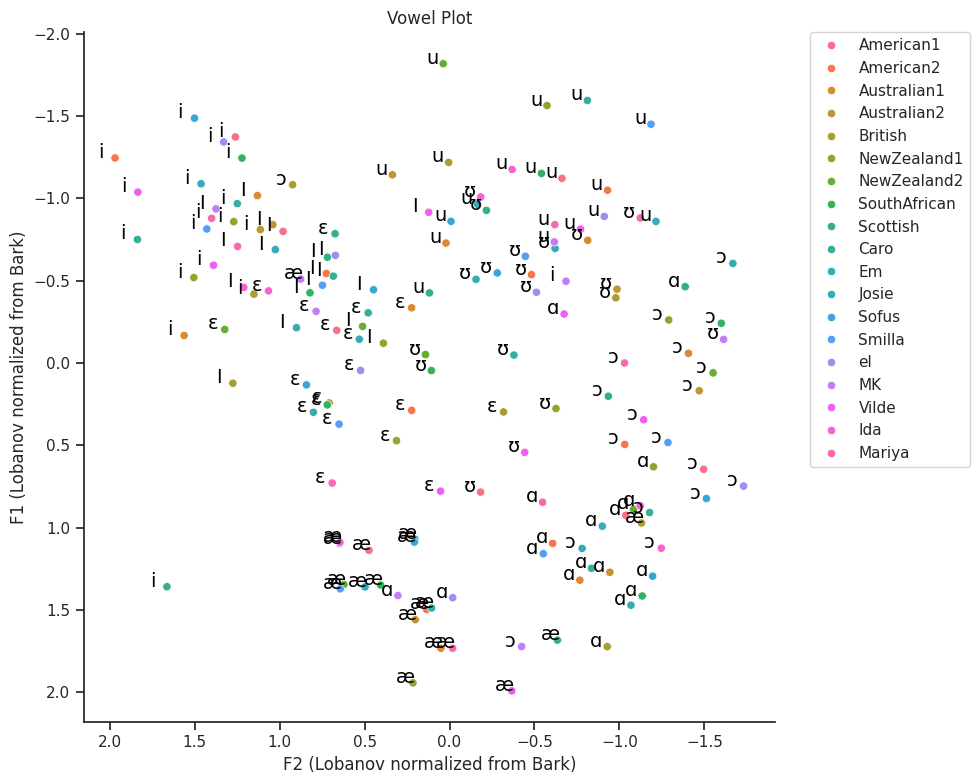

<Axes: title={'center': 'Vowel Plot'}, xlabel='F2 (Lobanov normalized from Bark)', ylabel='F1 (Lobanov normalized from Bark)'>

In [67]:


vowelplot(df,
          F1 = "zsc_F1",
          F2 = "zsc_F2",
          color = "Speaker",
          vowel = "Vowel",
          title = "Vowel Plot",
          unit = "Lobanov normalized from Bark",
          logscale = False)